# Neural Networks

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools import data_prep
from sklearn.preprocessing import StandardScaler

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [2]:
df = data_prep()
print(df)


(        Year  Month  MaxTemp  Rainfall  Evaporation  Sunshine  WindSpeed3pm  \
0       2008     11     23.0       0.7          5.5       7.6            24   
1       2008     11     25.1       0.0          5.5       7.6            22   
2       2008     11     25.7       0.0          5.5       7.6            26   
3       2008     11     28.0       0.0          5.5       7.6             9   
4       2008     11     32.3       1.0          5.5       7.6            20   
...      ...    ...      ...       ...          ...       ...           ...   
142214  2017      6     21.8       0.0          5.5       7.6            13   
142215  2017      6     23.4       0.0          5.5       7.6            11   
142216  2017      6     25.3       0.0          5.5       7.6             9   
142217  2017      6     26.9       0.0          5.5       7.6             9   
142218  2017      6     27.0       0.0          5.5       7.6             7   

        Pressure3pm  RainTomorrow  
0            1

In [3]:
from sklearn.neural_network import MLPClassifier

modelNN = MLPClassifier(random_state=42)
modelNN.fit(X_train, y_train)

print("Train accuracy:", modelNN.score(X_train, y_train))
print("Test accuracy:", modelNN.score(X_test, y_test))

y_pred = modelNN.predict(X_test)
print(classification_report(y_test, y_pred))

print(modelNN)

Train accuracy: 0.8210199592177031
Test accuracy: 0.8193643650682042
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     33101
           1       0.67      0.38      0.49      9565

    accuracy                           0.82     42666
   macro avg       0.76      0.66      0.69     42666
weighted avg       0.80      0.82      0.80     42666

MLPClassifier(random_state=42)


In [4]:
print(X_train.shape)

(99553, 8)


In [5]:
params = {'hidden_layer_sizes': [(x,) for x in range(1, 9, 1)]}

cvNN = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=42),
                    return_train_score=True, cv=10, n_jobs=-1)
cvNN.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,)]},
             return_train_score=True)

In [6]:
result_setNN = cvNN.cv_results_
print(result_setNN)

{'mean_fit_time': array([ 8.42668722, 10.9572099 , 13.94709053, 19.3878741 , 26.85119698,
       25.75178852, 31.75626624, 25.64008811]), 'std_fit_time': array([0.39266891, 2.18139179, 1.00777676, 2.69279531, 5.88813866,
       3.10379237, 6.17261753, 3.78998286]), 'mean_score_time': array([0.00355875, 0.00402818, 0.00478008, 0.0049052 , 0.00630846,
       0.00663989, 0.00518565, 0.00435309]), 'std_score_time': array([0.00113624, 0.00059753, 0.00096113, 0.00053348, 0.00146072,
       0.00178564, 0.00054067, 0.00156186]), 'param_hidden_layer_sizes': masked_array(data=[(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,)],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (1,)}, {'hidden_layer_sizes': (2,)}, {'hidden_layer_sizes': (3,)}, {'hidden_layer_sizes': (4,)}, {'hidden_layer_sizes': (5,)}, {'hidden_layer_sizes': (6,)}, {'hidden_layer_sizes': (7,)}, {'hidden_layer_sizes': (8,)}],

Total number of models:  8


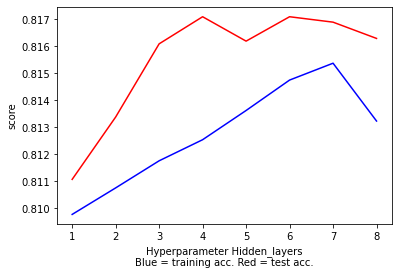

In [7]:
import matplotlib.pyplot as plt
train_result = result_setNN['split0_train_score']
test_result = result_setNN['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(1, 9 ,1))
plt.ylabel('score')
plt.show()

Total number of models:  8


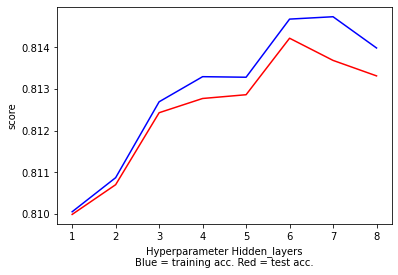

In [8]:
train_result = result_setNN['mean_train_score']
test_result = result_setNN['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(1,9,1))
plt.ylabel('score')
plt.show()

In [9]:
print("Train accuracy:", cvNN.score(X_train, y_train))
print("Test accuracy:", cvNN.score(X_test, y_test))

y_pred = cvNN.predict(X_test)
print(classification_report(y_test, y_pred))

print(cvNN.best_params_)
print(cvNN)

Train accuracy: 0.8147017166735306
Test accuracy: 0.8151689870154221
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     33101
           1       0.66      0.37      0.47      9565

    accuracy                           0.82     42666
   macro avg       0.75      0.66      0.68     42666
weighted avg       0.80      0.82      0.79     42666

{'hidden_layer_sizes': (6,)}
GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,)]},
             return_train_score=True)


In [10]:
params = {'hidden_layer_sizes': [(5,), (6,), (7,), (8,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cvNN1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cvNN1.fit(X_train, y_train)

print("Train accuracy:", cvNN1.score(X_train, y_train))
print("Test accuracy:", cvNN1.score(X_test, y_test))

y_pred = cvNN1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cvNN1.best_params_)
print(cvNN1)

Train accuracy: 0.8143200104466968
Test accuracy: 0.8147939811559556
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     33101
           1       0.66      0.37      0.47      9565

    accuracy                           0.81     42666
   macro avg       0.75      0.66      0.68     42666
weighted avg       0.80      0.81      0.79     42666

{'alpha': 0.001, 'hidden_layer_sizes': (8,)}
GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.001, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(5,), (6,), (7,), (8,)]})


In [11]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}


In [12]:
from dm_tools import analyse_feature_importance

analyse_feature_importance(dt_best.best_estimator_, X.columns)

Rainfall : 0.44773271332547065
Sunshine : 0.2890794255979461
Pressure3pm : 0.18621391504213367
MaxTemp : 0.05734217548567818
Month : 0.006728054507639215
WindSpeed3pm : 0.006211490669651024
Evaporation : 0.005570556524439531
Year : 0.0011216688470417292


In [13]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(99553, 3)


In [14]:
# Find best hyperparameter again since we have new input.
params = {'hidden_layer_sizes': [(x,) for x in range(1, 4, 1)]}

cvNNselect = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=42),return_train_score=True, cv=10, n_jobs=-1)
cvNNselect.fit(X_train_sel_model, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(1,), (2,), (3,)]},
             return_train_score=True)

In [15]:
print(cvNNselect.best_params_)

{'hidden_layer_sizes': (3,)}


In [16]:
# Decision tree feature selection neural network. 
params = {'hidden_layer_sizes': [(1,),(2,), (3,), (4,), (5,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_modelNN = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=42), cv=10, n_jobs=-1)
cv_sel_modelNN.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_modelNN.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_modelNN.score(X_test_sel_model, y_test))

y_predcv_sel_NN = cv_sel_modelNN.predict(X_test_sel_model)
print(classification_report(y_test, y_predcv_sel_NN))

print(cv_sel_modelNN.best_params_)

Train accuracy: 0.8092272457886753
Test accuracy: 0.8113486148221066
              precision    recall  f1-score   support

           0       0.83      0.94      0.89     33101
           1       0.65      0.35      0.46      9565

    accuracy                           0.81     42666
   macro avg       0.74      0.65      0.67     42666
weighted avg       0.79      0.81      0.79     42666

{'alpha': 0.01, 'hidden_layer_sizes': (5,)}


In [17]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = modelNN.predict_proba(X_test)
y_pred_proba_cv_1 = cvNN.predict_proba(X_test)
y_pred_proba_cv_2 = cvNN1.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_modelNN.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.8240827969799477
ROC index on test for NN with gridsearch 1: 0.8148083769592829
ROC index on test for NN with gridsearch 2: 0.8150829172694897
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.8031407540984078


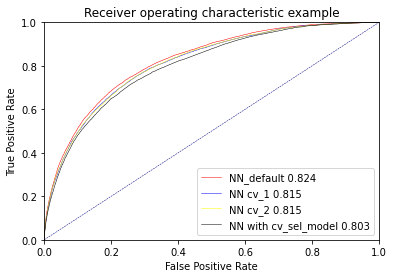

In [18]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), 
         color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

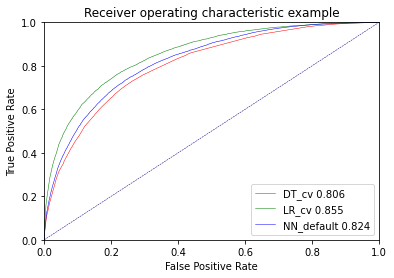

In [19]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr_cv, fpr_lr_cv, tpr_lr_cv = pickle.load(f)   
    

plt.plot(fpr_dt_cv, tpr_dt_cv, label='DT_cv {:.3f}'.format(roc_index_dt_cv), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='LR_cv {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 